Автор: Лейман М.А.   
Дата создания: 22.03.2025  

# Применение модели  
### детектирование объектов на видео и фото  

### Модель __YOLO__ 

проверка работы обученной модели  


In [1]:
from ultralytics import YOLO
import cv2
from PIL import ImageFont, ImageDraw, Image
import numpy as np


# Параметры
video_path = "data/video/video3.avi"  # Путь к входному видео
s_output_video_path = "data/video/video_yolo_s.avi"  # Путь к выходному видео


s_model_path_UAVOD_6 = "data/models/11s_best_UAVOD6.pt"


def video_detection(model_path, video_path, output_video_path, target_classes=None):
    model = YOLO(model_path)

    screen_width = 1000
    screen_height = 1000
    conf = 0.1
    iou = 0.4

    cap = cv2.VideoCapture(video_path)
    fourcc = cv2.VideoWriter_fourcc(*'XVID')
    out = cv2.VideoWriter(output_video_path, fourcc, 30, (screen_width, screen_height))

    while cap.isOpened():
        ret, frame = cap.read()
        if not ret:
            break

        frame_resized = cv2.resize(frame, (screen_width, screen_height))
        results = model.track(frame_resized, persist=True, conf=conf, iou=iou, agnostic_nms=True, verbose=False)

        for result in results:
            boxes = result.boxes.xyxy.cpu().numpy()
            labels = result.boxes.cls.cpu().numpy()
            scores = result.boxes.conf.cpu().numpy()
            track_ids = result.boxes.id.cpu().numpy() if result.boxes.id is not None else [None] * len(boxes)

            for box, label, score in zip(boxes, labels, scores):
                class_name = model.names[int(label)]
                
                # Фильтрация по нужным классам
                if target_classes and class_name not in target_classes:
                    continue

                x1, y1, x2, y2 = map(int, box)
                cv2.rectangle(frame_resized, (x1, y1), (x2, y2), (0, 255, 0), 1)
                cv2.putText(frame_resized, f'{class_name} {score:.2f}', (x1, y1 - 10),
                            cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 1)

        out.write(frame_resized)
        cv2.imshow('Frame', frame_resized)

        if cv2.waitKey(1) & 0xFF == ord('q'):
            break

    cap.release()
    out.release()
    cv2.destroyAllWindows()

target_classes=['building', 'plane', 'fish net', 'landslide', 'pool', 'house', 'quarry', 'ship', 'vehicle', 'well', 'harbor', 'big vehicle', 'helicopter']


## Просмотр работы модели обученной на датасете UAVOD

In [10]:
target_classes=['building',  'house',  'ship', 'vehicle', 'well', 'harbor', 'big vehicle']

video_detection(s_model_path_UAVOD_6, video_path = "data/videos/video_in/video_12.avi", output_video_path = "data/videos/video_out/video_yolo_s_UAVOD_231.avi", target_classes=target_classes)

In [12]:
target_classes=['building',  'house',  'ship', 'vehicle', 'well', 'harbor', 'big vehicle']

video_detection(s_model_path_UAVOD_6, video_path = "data/videos/video_in/video_13.avi", output_video_path = "data/videos/video_out/video_yolo_s_UAVOD_231.avi", target_classes=target_classes)

## Детекция  классов  ['building',  'house',  'ship', 'vehicle', 'well', 'harbor', 'big vehicle']  модели обученной на датасете только __UAVOD__.


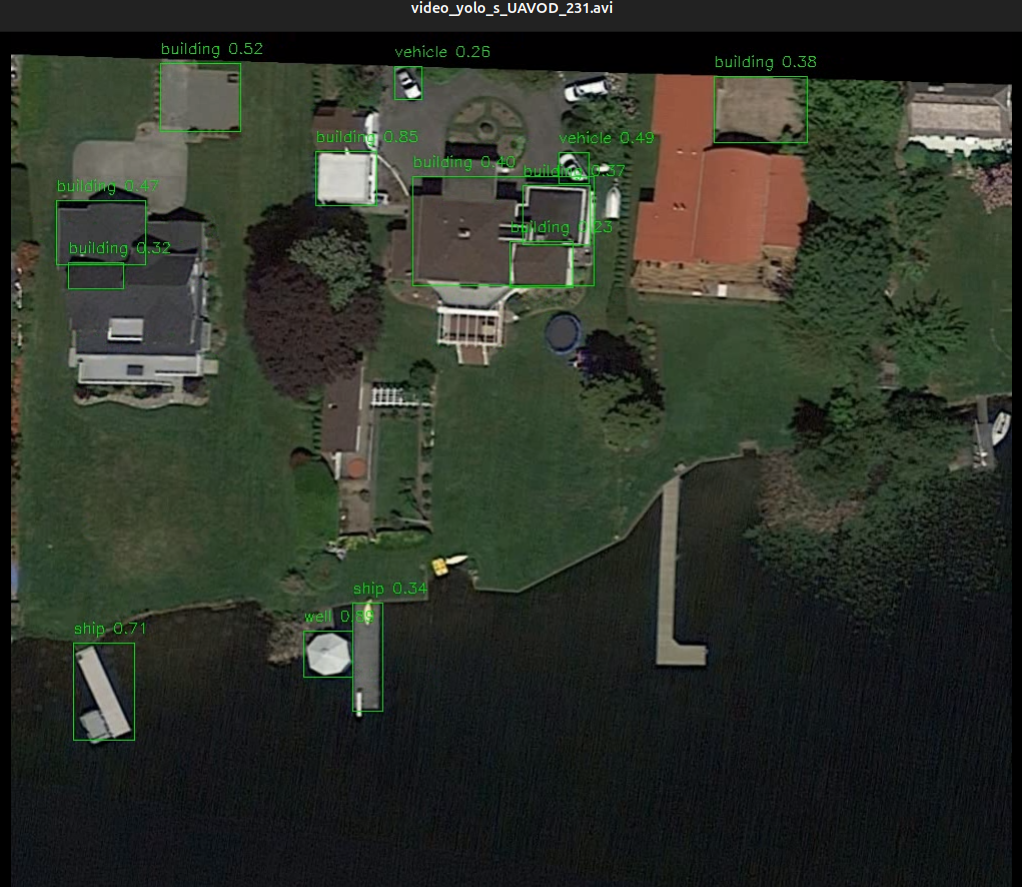

## Детекция  классов  ['building',  'house',  'ship', 'vehicle', 'well', 'harbor', 'big vehicle']  модели обученной на датасете  __UAVOD__ + __DOTA__

Здания детектируются более уверено. Так же детектируются объекты не определяемые ранее  


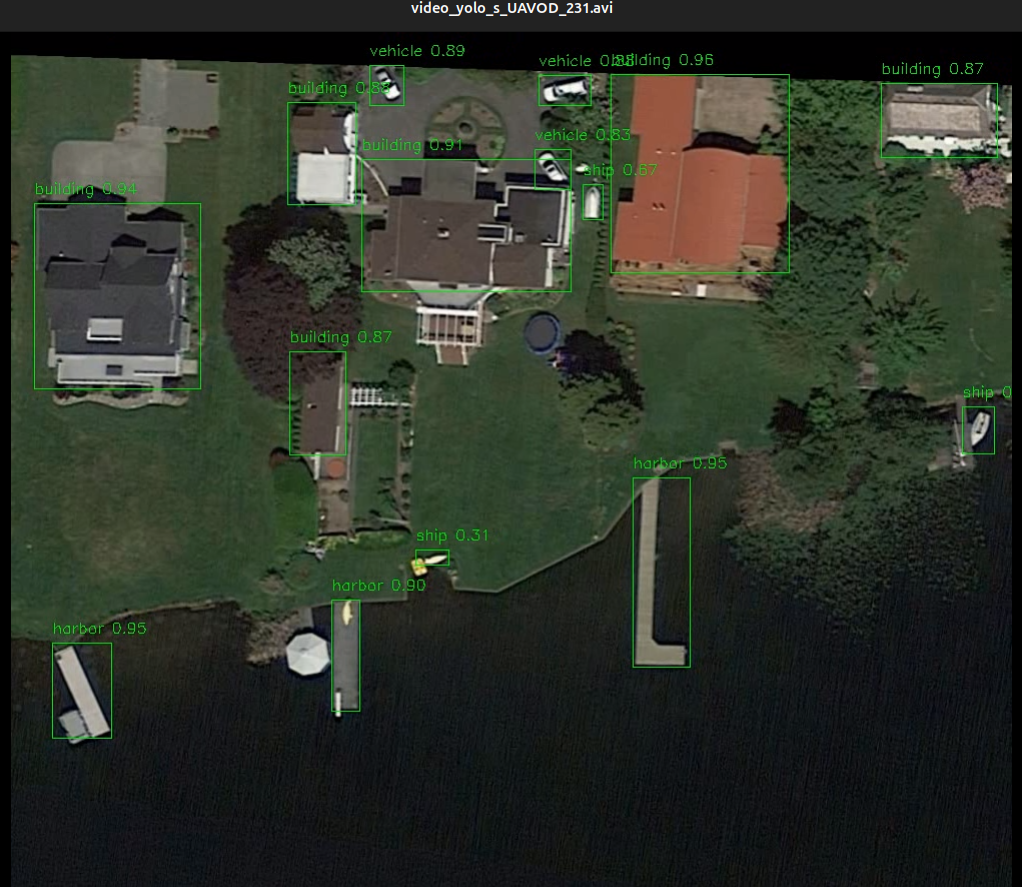  



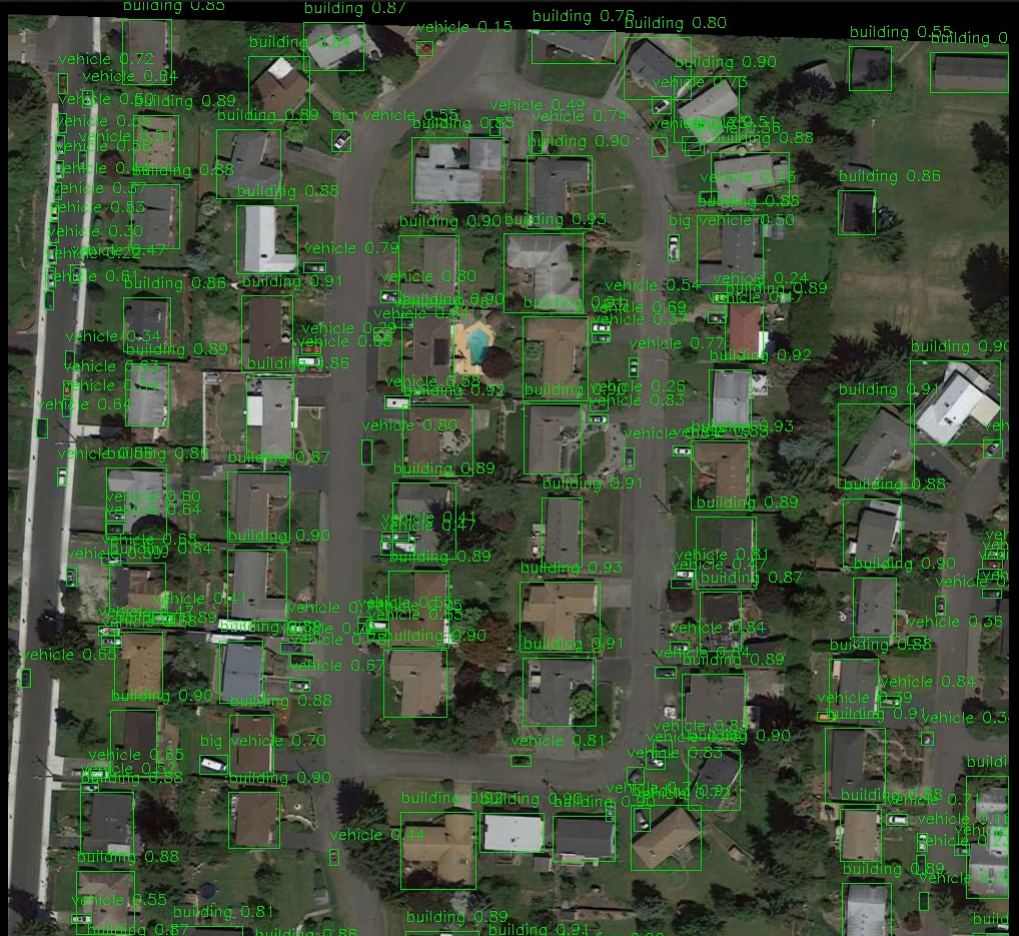